In [1]:
!curl -o data/Farmhouse_in_Provence.jpg -O https://upload.wikimedia.org/wikipedia/commons/thumb/0/06/Farmhouse_in_Provence%2C_1888%2C_Vincent_van_Gogh%2C_NGA.jpg/318px-Farmhouse_in_Provence%2C_1888%2C_Vincent_van_Gogh%2C_NGA.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 39060  100 39060    0     0  47855      0 --:--:-- --:--:-- --:--:-- 47809


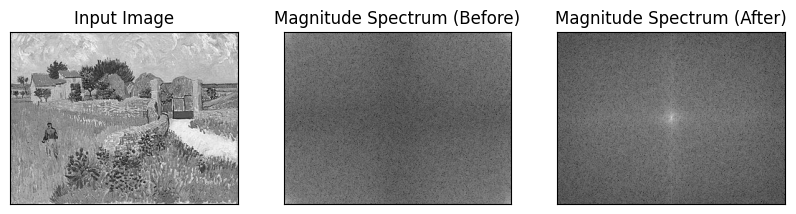

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像の読み込み
img = cv2.imread("data/Farmhouse_in_Provence.jpg", 0)

# フーリエ変換の適用
f = np.fft.fft2(img)  # fft = Fast Fourier Transform
fshift = np.fft.fftshift(f)

# 振幅スペクトルの計算
magnitude_spectrum = 20 * np.log(np.abs(f))
magnitude_spectrum_shifted = 20 * np.log(np.abs(fshift))

# 結果の表示
plt.figure(figsize=(10, 8))

# 入力画像
plt.subplot(131)
plt.imshow(img, cmap="gray")
plt.title("Input Image")
plt.xticks([]), plt.yticks([])

# 中心シフト前の振幅スペクトル
plt.subplot(132)
plt.imshow(magnitude_spectrum, cmap="gray")
plt.title("Magnitude Spectrum (Before)")
plt.xticks([]), plt.yticks([])

# 中心シフト後の振幅スペクトル
plt.subplot(133)
plt.imshow(magnitude_spectrum_shifted, cmap="gray")
plt.title("Magnitude Spectrum (After)")
plt.xticks([]), plt.yticks([])

plt.show()

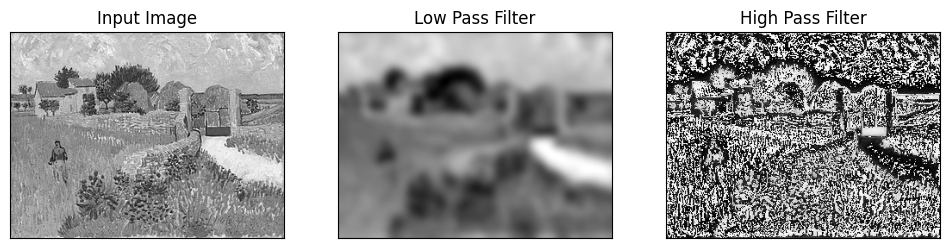

In [5]:
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage

# 画像の読み込み
img = cv2.imread("data/Farmhouse_in_Provence.jpg", 0)

# ガウシアンフィルタによるローパスフィルタの適用
low_pass = ndimage.gaussian_filter(img, sigma=5)

# 原画像からローパスフィルタの結果を引くことでハイパスフィルタを実現
high_pass = img - low_pass

# 結果の表示
plt.figure(figsize=(12, 8))

# 入力画像
plt.subplot(131)
plt.imshow(img, cmap="gray")
plt.title("Input Image")
plt.xticks([]), plt.yticks([])

# ローパスフィルタ
plt.subplot(132)
plt.imshow(low_pass, cmap="gray")
plt.title("Low Pass Filter")
plt.xticks([]), plt.yticks([])

# ハイパスフィルタ
plt.subplot(133)
plt.imshow(high_pass, cmap="gray")
plt.title("High Pass Filter")
plt.xticks([]), plt.yticks([])

plt.show()